In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')

In [3]:
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


so here as per problem statment we need to dectect the restaurant review is positive or neative . So we will use the NLP to slove this problem

## Cleaning the Data

First i will do all step of clening process on first review only show all the output to understant all the step tahn we will do thsi for all dataset

First we need to remove all the unnessary charater from reviews for eg. queation mark , comma ,number ect. we want only alphabate to dectect the review is positive or not

In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/wasim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


As we can see it remove the ... part from review and replace it with space .
Now we will conver the all text in samll alphabate

In [5]:
sample=re.sub('[^a-zA-Z]',' ',data['Review'][0])
sample

'Wow    Loved this place '

In [6]:
sample=sample.lower()
sample

'wow    loved this place '

In [7]:
sample=sample.split()
sample

['wow', 'loved', 'this', 'place']

Now we need to remove all the unnessary words from review like  AND , I , IF , This ects . So we need to use Nature Langauge Tool kit we will  import thiss library and remove all this word . So we need to import stopwords 

In [8]:
ps=PorterStemmer
sample=[word  for word in sample if not word in set(stopwords.words('english'))]
sample

['wow', 'loved', 'place']

### Now we will do all this process on all data set using for loop

In [9]:
data.shape[0]

1000

In [10]:
NewReview=[]
for i in range (0,data.shape[0]):
    review=re.sub('[^a-zA-Z]',' ',data['Review'][i])
    review=review.lower()
    review=review.split()
    ps=PorterStemmer()  #Stemming:  Stemming is a rudimentary rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
    all_stopword=stopwords.words('english')
    all_stopword.remove('not') #this will remove 'not from stopwords as it is requried for negative review'
    review=[ps.stem(word) for word in review if not word in set(all_stopword)]
    review=' '.join(review)
    NewReview.append(review)

In [11]:
NewReview[0]

'wow love place'

## Create a Bag of Word Model

A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
cv=CountVectorizer()

In [14]:
x=cv.fit_transform(NewReview).toarray()
y=data.iloc[:,-1].values

In [15]:
vector= pd.DataFrame(x, columns=cv.get_feature_names())
vector

/home/wasim/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split as tts

In [17]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.20,random_state=0)

In [18]:
x_train.shape ,x_test.shape

((800, 1566), (200, 1566))

## Fitting the Model

### 1. Fitting the Naive base model

In [19]:
from sklearn.naive_bayes import GaussianNB

In [22]:
NB=GaussianNB()
NB.fit(x_train,y_train)
y_pred= NB.predict(x_test)

In [23]:
from sklearn.metrics import accuracy_score , plot_confusion_matrix

In [24]:
accuracy_score(y_test,y_pred)

0.73

/home/wasim/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


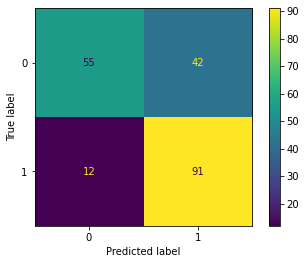

In [25]:
plot_confusion_matrix(NB , x_test,y_test)

In [26]:
from sklearn.model_selection import cross_val_score

In [29]:
cvs=cross_val_score(NB , x,y , cv=5, scoring='accuracy')
cvs.mean()

0.677

### 2. Fitting Data Using RandomForest

In [32]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [33]:
classifier= RFC(n_estimators=50,max_depth=5,oob_score=True,n_jobs=-1,random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [34]:
accuracy_score(y_test,y_pred)

0.77

### Tunning the parmeter for RandomForest

In [35]:
from sklearn.model_selection import GridSearchCV

In [36]:
classifier_1=RFC(n_jobs=-1,random_state=0)

In [37]:
parmeter={
    'n_estimators':[5,10,25,50,70,100,150],
    'max_depth':[2,5,10,15,50,100,125],
    'min_samples_leaf':[2,5,7,50,100,200]
}

In [38]:
%%time
grid_search=GridSearchCV(estimator=classifier_1,
                        param_grid=parmeter,
                        cv=5, n_jobs=-1, scoring='accuracy')

CPU times: user 0 ns, sys: 28 µs, total: 28 µs
Wall time: 31.9 µs


In [39]:
%%time
grid_search.fit(x_train,y_train)

CPU times: user 4.3 s, sys: 386 ms, total: 4.69 s
Wall time: 2min 15s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 50, 100, 125],
                         'min_samples_leaf': [2, 5, 7, 50, 100, 200],
                         'n_estimators': [5, 10, 25, 50, 70, 100, 150]},
             scoring='accuracy')

In [41]:
best_estimator=grid_search.best_estimator_
best_estimator

RandomForestClassifier(max_depth=50, min_samples_leaf=2, n_estimators=70,
                       n_jobs=-1, random_state=0)

In [42]:
grid_search.best_score_

0.7874999999999999

In [43]:
best_estimator.fit(x_train,y_train)
y_pred=best_estimator.predict(x_test)

In [44]:
accuracy_score(y_test,y_pred)

0.765

/home/wasim/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


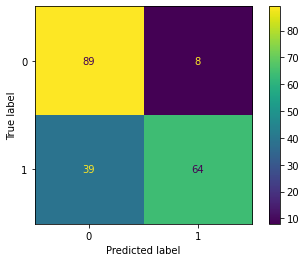

In [46]:
plot_confusion_matrix(best_estimator,x_test,y_test)

### Fitting Model Using LogisticReression

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

In [49]:
accuracy_score(y_test,y_pred)

0.775

/home/wasim/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


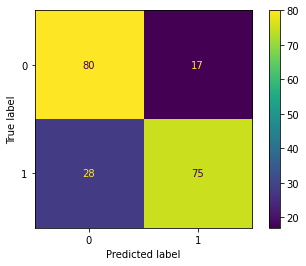

In [50]:
plot_confusion_matrix(LR,x_test,y_test)

In [56]:
score=cross_val_score(LR,x,y,cv=5 ,scoring='accuracy')
score.mean()

0.7969999999999999